In [4]:
import numpy as np
import pandas as pd
data = {
    'Cabin': [None, 'C85', None, 'C123', None],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
    'number': [5, 3, 6, 3, 'A'],
    'Survived': [0, 1, 1, 1, 0]
}

# Converting to a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

  Cabin            Ticket number  Survived
0  None         A/5 21171      5         0
1   C85          PC 17599      3         1
2  None  STON/O2. 3101282      6         1
3  C123            113803      3         1
4  None            373450      A         0


In [5]:
df['number'].unique()

array([5, 3, 6, 'A'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

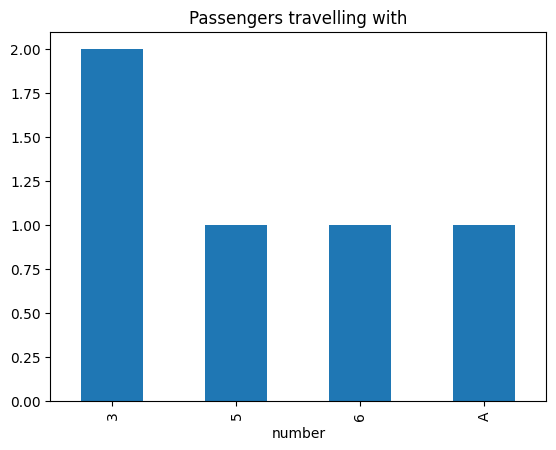

In [6]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')


In [7]:
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,None,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,None,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,None,373450,A,0,NaN,A


In [8]:
df['Cabin'].unique()


array([None, 'C85', 'C123'], dtype=object)

In [9]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
      dtype=object)

In [10]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,None,A/5 21171,5,0,5.0,NaN,NaN,None
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,None,STON/O2. 3101282,6,1,6.0,NaN,NaN,None
3,C123,113803,3,1,3.0,NaN,123,C
4,None,373450,A,0,NaN,A,NaN,None


<Axes: xlabel='cabin_cat'>

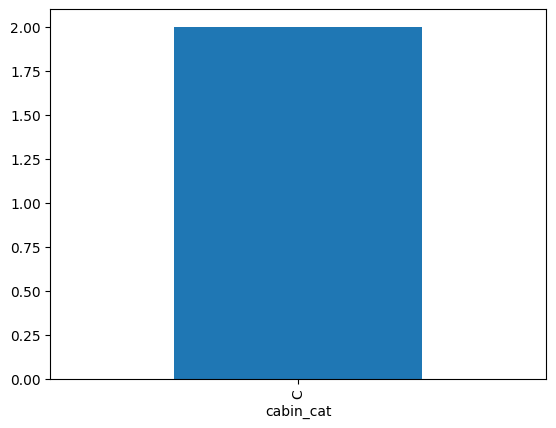

In [11]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [12]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,None,A/5 21171,5,0,5.0,NaN,NaN,None,21171,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599,PC
2,None,STON/O2. 3101282,6,1,6.0,NaN,NaN,None,3101282,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803,NaN
4,None,373450,A,0,NaN,A,NaN,None,373450,NaN
